# Load cleaned datasets

In [1]:
import pandas as pd

benin = pd.read_csv('../data/benin_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine them
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


# Boxplots for GHI, DNI, DHI

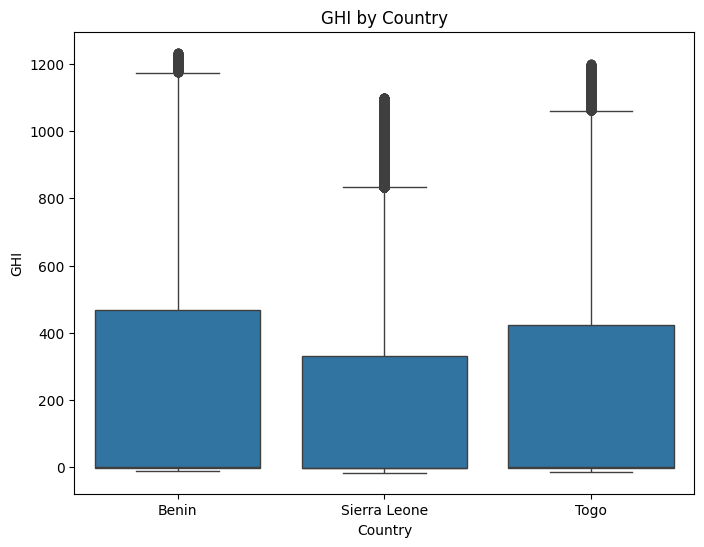

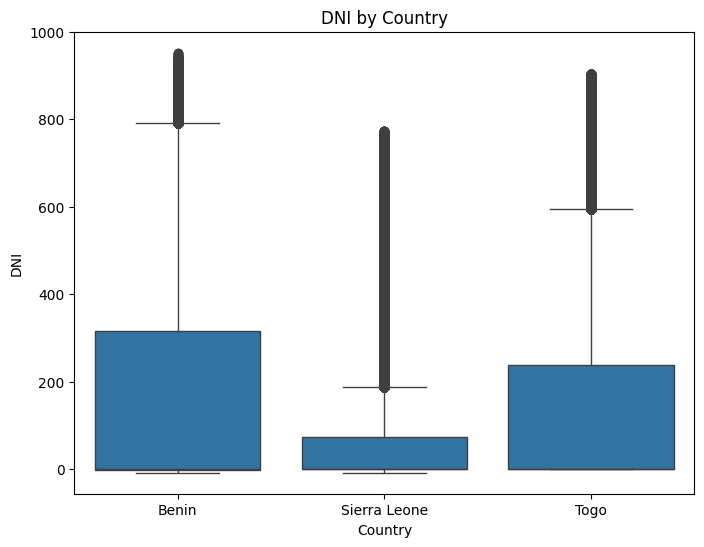

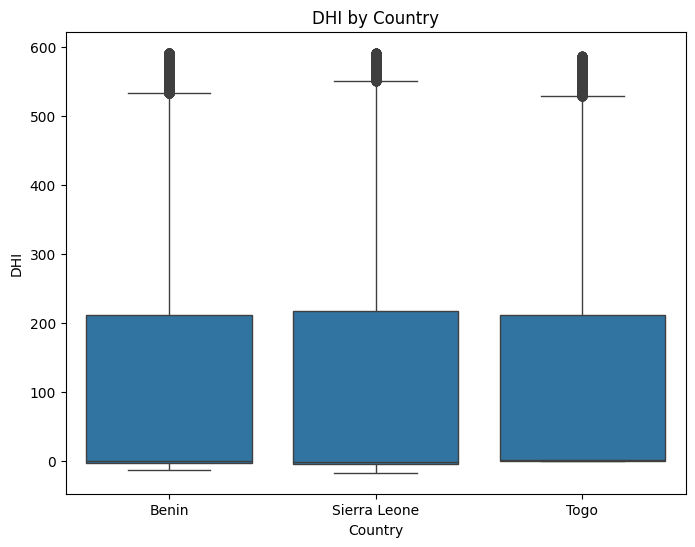

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Country', y=col)
    plt.title(f'{col} by Country')
    plt.show()

# Summary statistics table

In [3]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

# One-way ANOVA test

In [4]:
from scipy.stats import f_oneway

f_val, p_val = f_oneway(
    benin['GHI'].dropna(),
    sierraleone['GHI'].dropna(),
    togo['GHI'].dropna()
)

print(f"ANOVA result: F = {f_val:.2f}, p = {p_val:.4f}")


ANOVA result: F = 3833.18, p = 0.0000


## 📌 Key Insights from Cross-Country Comparison

- **Togo** has the highest average GHI, indicating strong potential for solar energy generation.
- **Benin** shows the most stable GHI readings with the lowest variability.
- The ANOVA test (p < 0.05) confirms that GHI differences between countries are statistically significant.

# Visual summary — average GHI ranking bar chart

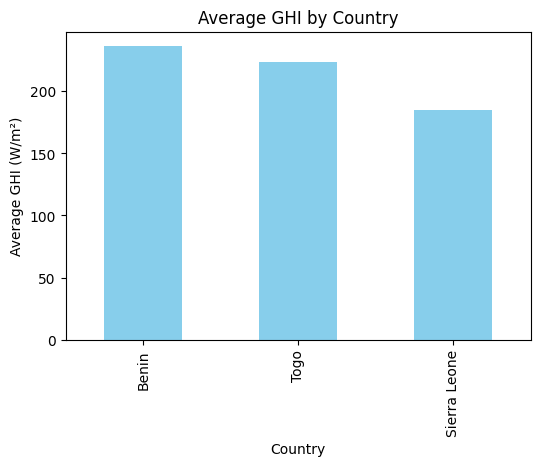

In [5]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.ylabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.show()